In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression,ElasticNet,Ridge,Lasso
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import mean_squared_error

In [ ]:
df = pd.read_csv("/content/Shrinkage Limit Data.xlsx - Sheet2.csv").drop(['Unnamed: 0','Unnamed: 1','Reference'],axis='columns')
print(df.columns)
df.info()


Index(['Gravel (%)', 'Sand (%)', 'Silt (%)', 'Clay (%)',
       'Liquid Limit, LL (%)', 'Plastic Limit, PL (%)',
       'Plasticity Index, PI (%), PI = LL - PL', 'Specific Gravity',
       'Maximum Dry Density, MDD (kN/m3)', 'Optimum Moisture Content, OMC (%)',
       'Shrinkage Limit, SL (%)'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Gravel (%)                              92 non-null     float64
 1   Sand (%)                                92 non-null     float64
 2   Silt (%)                                87 non-null     float64
 3   Clay (%)                                87 non-null     float64
 4   Liquid Limit, LL (%)                    92 non-null     float64
 5   Plastic Limit, PL (%)                   92 non-null     float64
 6   Plasticity Index, PI 

In [ ]:
df.describe()

,Gravel (%),Sand (%),Silt (%),Clay (%),"Liquid Limit, LL (%)","Plastic Limit, PL (%)","Plasticity Index, PI (%), PI = LL - PL",Specific Gravity,"Maximum Dry Density, MDD (kN/m3)","Optimum Moisture Content, OMC (%)","Shrinkage Limit, SL (%)"
count,92.000000,92.000000,87.000000,87.000000,92.000000,92.000000,92.000000,71.000000,53.000000,44.000000,92.000000
mean,1.242717,17.108587,42.255287,40.266552,77.970109,33.732609,44.237500,2.694085,13.812453,28.833182,21.163587
std,4.489499,19.868467,16.623645,19.838510,50.171567,12.373396,45.034456,0.071105,1.891503,9.787764,13.018804
min,0.000000,0.000000,1.000000,0.000000,30.000000,0.000000,-2.000000,2.490000,8.130000,11.300000,8.000000
25%,0.000000,1.990000,33.750000,26.000000,53.852500,24.905000,23.875000,2.650000,12.650000,24.502500,13.000000
50%,0.000000,10.000000,40.600000,43.140000,64.700000,32.050000,32.800000,2.700000,13.620000,27.800000,17.000000
75%,0.240000,28.275000,50.250000,57.265000,87.685000,40.002500,52.250000,2.730000,14.610000,32.250000,23.522500
max,27.000000,99.000000,98.000000,73.950000,393.400000,81.700000,343.300000,2.880000,18.910000,78.000000,77.000000


In [ ]:
df.corr()

,Gravel (%),Sand (%),Silt (%),Clay (%),"Liquid Limit, LL (%)","Plastic Limit, PL (%)","Plasticity Index, PI (%), PI = LL - PL",Specific Gravity,"Maximum Dry Density, MDD (kN/m3)","Optimum Moisture Content, OMC (%)","Shrinkage Limit, SL (%)"
Gravel (%),1.000000,0.346754,-0.309496,-0.344674,-0.153865,-0.079580,-0.149552,-0.013648,0.267575,-0.241532,-0.037579
Sand (%),0.346754,1.000000,-0.451988,-0.776015,-0.247744,0.123771,-0.310010,-0.190409,0.047358,-0.046326,-0.080324
Silt (%),-0.309496,-0.451988,1.000000,-0.098301,-0.141872,-0.046261,-0.144823,-0.162740,0.143730,0.167298,0.218018
Clay (%),-0.344674,-0.776015,-0.098301,1.000000,0.415340,-0.092354,0.484585,0.330892,-0.088768,-0.009038,-0.088123
"Liquid Limit, LL (%)",-0.153865,-0.247744,-0.141872,0.415340,1.000000,0.517230,0.971960,0.336828,-0.479664,0.645983,0.095333
"Plastic Limit, PL (%)",-0.079580,0.123771,-0.046261,-0.092354,0.517230,1.000000,0.301477,0.078594,-0.633410,0.763988,0.168943
"Plasticity Index, PI (%), PI = LL - PL",-0.149552,-0.310010,-0.144823,0.484585,0.971960,0.301477,1.000000,0.367693,-0.303875,0.443635,0.059790
Specific Gravity,-0.013648,-0.190409,-0.162740,0.330892,0.336828,0.078594,0.367693,1.000000,0.105655,-0.091754,-0.284622
"Maximum Dry Density, MDD (kN/m3)",0.267575,0.047358,0.143730,-0.088768,-0.479664,-0.633410,-0.303875,0.105655,1.000000,-0.740244,-0.268627
"Optimum Moisture Content, OMC (%)",-0.241532,-0.046326,0.167298,-0.009038,0.645983,0.763988,0.443635,-0.091754,-0.740244,1.000000,0.273373


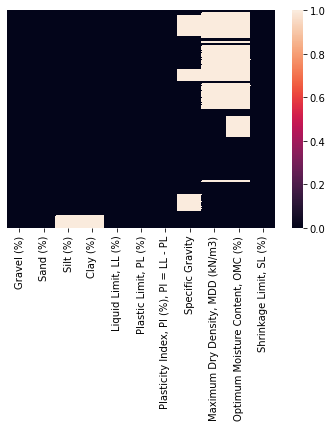

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=True)

In [ ]:

df_mdd = df[['Liquid Limit, LL (%)', 'Plastic Limit, PL (%)','Maximum Dry Density, MDD (kN/m3)']].dropna()
X_train_mdd = df_mdd[['Liquid Limit, LL (%)', 'Plastic Limit, PL (%)']]
Y_train_mdd = df_mdd['Maximum Dry Density, MDD (kN/m3)']
X_test_mdd = df[df['Maximum Dry Density, MDD (kN/m3)'].isnull()][['Liquid Limit, LL (%)', 'Plastic Limit, PL (%)']]

In [ ]:
model_mdd =RandomForestRegressor()
model_mdd.fit(X_train_mdd,Y_train_mdd)
model_mdd.score(X_train_mdd,Y_train_mdd)
mdd_pred = model_mdd.predict(X_test_mdd)


In [ ]:
df.loc[df['Maximum Dry Density, MDD (kN/m3)'].isnull(),'Maximum Dry Density, MDD (kN/m3)'] = mdd_pred

In [ ]:
df.info()
df = df.drop('Optimum Moisture Content, OMC (%)',axis='columns')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Gravel (%)                              92 non-null     float64
 1   Sand (%)                                92 non-null     float64
 2   Silt (%)                                87 non-null     float64
 3   Clay (%)                                87 non-null     float64
 4   Liquid Limit, LL (%)                    92 non-null     float64
 5   Plastic Limit, PL (%)                   92 non-null     float64
 6   Plasticity Index, PI (%), PI = LL - PL  92 non-null     float64
 7   Specific Gravity                        71 non-null     float64
 8   Maximum Dry Density, MDD (kN/m3)        92 non-null     float64
 9   Optimum Moisture Content, OMC (%)       44 non-null     float64
 10  Shrinkage Limit, SL (%)                 92 non-null     float64


In [ ]:
df['Maximum Dry Density, MDD (kN/m3)'].isnull()

0     False
1     False
2     False
3     False
4     False
      ...  
87    False
88    False
89    False
90    False
91    False
Name: Maximum Dry Density, MDD (kN/m3), Length: 92, dtype: bool

In [ ]:
X_train_sand_gravel = df[['Sand (%)','Gravel (%)']][:87]
Y_train_clay = df['Clay (%)'][:87]
Y_train_silt = df['Silt (%)'][:87]
X_test_sand_garvel = df[['Sand (%)','Gravel (%)']][87:92]
Y_test_clay = df['Clay (%)'][87:92]
Y_test_silt = df['Silt (%)'][87:92]


In [ ]:
df_dropped = df.dropna()
df_dropped

,Gravel (%),Sand (%),Silt (%),Clay (%),"Liquid Limit, LL (%)","Plastic Limit, PL (%)","Plasticity Index, PI (%), PI = LL - PL",Specific Gravity,"Maximum Dry Density, MDD (kN/m3)","Shrinkage Limit, SL (%)"
0,0.00,2.00,52.00,46.00,53.0,20.0,33.0,2.69,16.120000,11.00
1,0.40,37.70,39.70,22.20,86.8,53.4,33.4,2.69,12.853700,15.70
11,0.00,3.60,96.40,49.20,52.2,24.1,28.1,2.69,14.728800,13.40
12,0.00,5.00,31.00,64.00,93.0,38.0,55.0,2.76,13.140000,22.00
13,0.00,99.00,1.00,0.00,55.0,36.0,19.0,2.66,11.999147,14.80
...,...,...,...,...,...,...,...,...,...,...
75,0.31,2.26,37.57,59.86,86.3,32.7,53.6,2.74,12.090000,10.11
76,1.63,3.84,37.07,57.46,82.5,30.4,52.1,2.70,12.100000,17.86
77,0.77,2.79,34.51,61.94,78.8,31.6,47.2,2.73,14.160000,9.89
85,0.00,4.00,43.00,53.00,73.7,23.2,50.5,2.71,14.900000,20.30


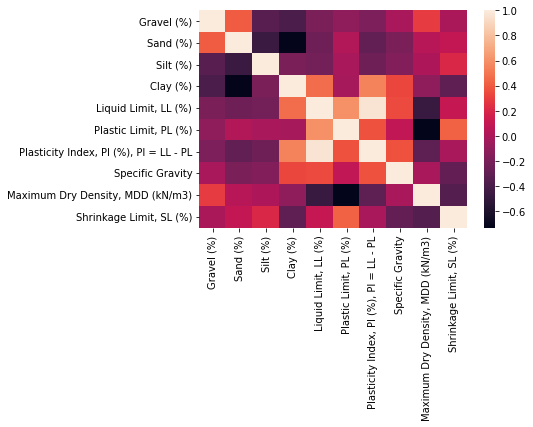

In [ ]:
df_dropped
sns.heatmap(df_dropped.corr())


In [ ]:
'''Sand -> Gravel - .80
   plastic_index->liquid_limit- 1.0
   clay->Sand- -1
   max_dry_density->plastic_limit- -1
   optimum_moisture_content -> Max_dry_density- -1'''


'Sand -> Gravel - .80\n   plastic_index->liquid_limit- 1.0\n   clay->Sand- -1\n   max_dry_density->plastic_limit- -1\n   optimum_moisture_content -> Max_dry_density- -1'

In [ ]:
li =[.1,.2,.3,.4,.5,.6,.7,.8,.9,1]
for i in li:
  model = Ridge(alpha = i)
  model.fit(X_train_sand_gravel,Y_train_clay)
  print(i,model.score(X_train_sand_gravel,Y_train_clay))

0.1 0.6087602369883676
0.2 0.6087602369206361
0.3 0.6087602368077665
0.4 0.6087602366497729
0.5 0.6087602364466687
0.6 0.6087602361984675
0.7 0.6087602359051834
0.8 0.6087602355668291
0.9 0.6087602351834189
1 0.608760234754966


In [ ]:
li =[.1,.2,.3,.4,.5,.6,.7,.8,.9,1]
for i in li:
  model = Lasso(alpha = i)
  model.fit(X_train_sand_gravel,Y_train_clay)
  print(i,model.score(X_train_sand_gravel,Y_train_clay))

0.1 0.6087589904311261
0.2 0.6087552540864681
0.3 0.6087490279434311
0.4 0.608740312002015
0.5 0.6087291062622198
0.6 0.6087154107240454
0.7 0.6086992253874919
0.8 0.6086805502525595
0.9 0.6086593853192477
1 0.6086357305875572


In [ ]:
li =[.1,.2,.3,.4,.5,.6,.7,.8,.9,1]
for i in li:
  model = ElasticNet(alpha = i)
  model.fit(X_train_sand_gravel,Y_train_clay)
  print(i,model.score(X_train_sand_gravel,Y_train_clay))

0.1 0.6087596606166656
0.2 0.608757944092208
0.3 0.6087551042795696
0.4 0.6087511577829108
0.5 0.6087461209398679
0.6 0.6087400098263103
0.7 0.6087328402609999
0.8 0.6087246278101603
0.9 0.6087153877919533
1 0.6087051352808666


In [ ]:
model = SVR()
model.fit(X_train_sand_gravel,Y_train_clay)
model.score(X_train_sand_gravel,Y_train_clay)

0.48762940498290175

In [ ]:
df['Sand_sqrd']=df['Sand (%)']**2
X_train_sand =df[['Sand (%)','Sand_sqrd']][:87]
model = Lasso(alpha=1)
model.fit(X_train_sand,Y_train_clay)
model.score(X_train_sand,Y_train_clay)

0.6364513227824413

In [ ]:
model = SVR()
model.fit(X_train_sand,Y_train_clay)
model.score(X_train_sand,Y_train_clay)

0.4391130013543716

In [ ]:
model_clay = RandomForestRegressor(n_estimators=100)
model_clay.fit(X_train_sand_gravel,Y_train_clay)
model_clay.score(X_train_sand_gravel,Y_train_clay)

0.7932485296755738

In [ ]:
model_silt =DecisionTreeRegressor()
model_silt.fit(X_train_sand_gravel,Y_train_silt)
model_silt.score(X_train_sand_gravel,Y_train_silt)

0.6674391382896949

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Gravel (%)                              92 non-null     float64
 1   Sand (%)                                92 non-null     float64
 2   Silt (%)                                92 non-null     float64
 3   Clay (%)                                92 non-null     float64
 4   Liquid Limit, LL (%)                    92 non-null     float64
 5   Plastic Limit, PL (%)                   92 non-null     float64
 6   Plasticity Index, PI (%), PI = LL - PL  92 non-null     float64
 7   Specific Gravity                        92 non-null     float64
 8   Maximum Dry Density, MDD (kN/m3)        92 non-null     float64
 9   Shrinkage Limit, SL (%)                 92 non-null     float64
 10  Sand_sqrd                               92 non-null     float64


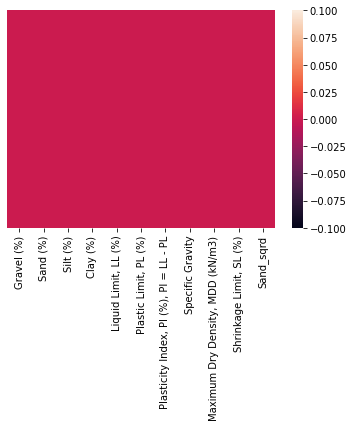

In [ ]:
df['Clay (%)'][87:92]= model_clay.predict(df[['Sand (%)','Gravel (%)']][87:92])

df['Silt (%)'][87:92]=model_silt.predict(df[['Sand (%)','Gravel (%)']][87:92])
mean = df['Specific Gravity'].mean()
df['Specific Gravity'].fillna(value=mean,inplace=True)
sns.heatmap(df.isnull(),yticklabels=False)
df['Specific Gravity']
df.info()


In [ ]:
df = df.drop('Sand_sqrd',axis='columns')
df 

,Gravel (%),Sand (%),Silt (%),Clay (%),"Liquid Limit, LL (%)","Plastic Limit, PL (%)","Plasticity Index, PI (%), PI = LL - PL",Specific Gravity,"Maximum Dry Density, MDD (kN/m3)","Shrinkage Limit, SL (%)"
0,0.0,2.0,52.000000,46.000000,53.0,20.0,33.0,2.690000,16.1200,11.00
1,0.4,37.7,39.700000,22.200000,86.8,53.4,33.4,2.690000,12.8537,15.70
2,0.5,53.8,33.500000,12.200000,56.4,37.3,19.1,2.694085,12.0262,23.50
3,0.2,41.7,38.800000,20.000000,80.0,52.2,27.8,2.694085,12.8709,18.10
4,0.2,26.9,40.500000,32.400000,105.6,67.0,38.6,2.694085,10.6431,12.00
...,...,...,...,...,...,...,...,...,...,...
87,0.0,15.0,34.333333,48.963528,61.0,24.0,37.0,2.700000,13.6500,23.59
88,0.0,17.0,74.500000,24.957917,58.0,22.0,36.0,2.700000,13.6500,26.68
89,0.0,19.0,42.500000,40.838917,60.0,23.0,37.0,2.700000,13.7500,24.66
90,0.0,13.0,35.500000,46.476333,54.0,21.0,33.0,2.700000,14.7800,18.58


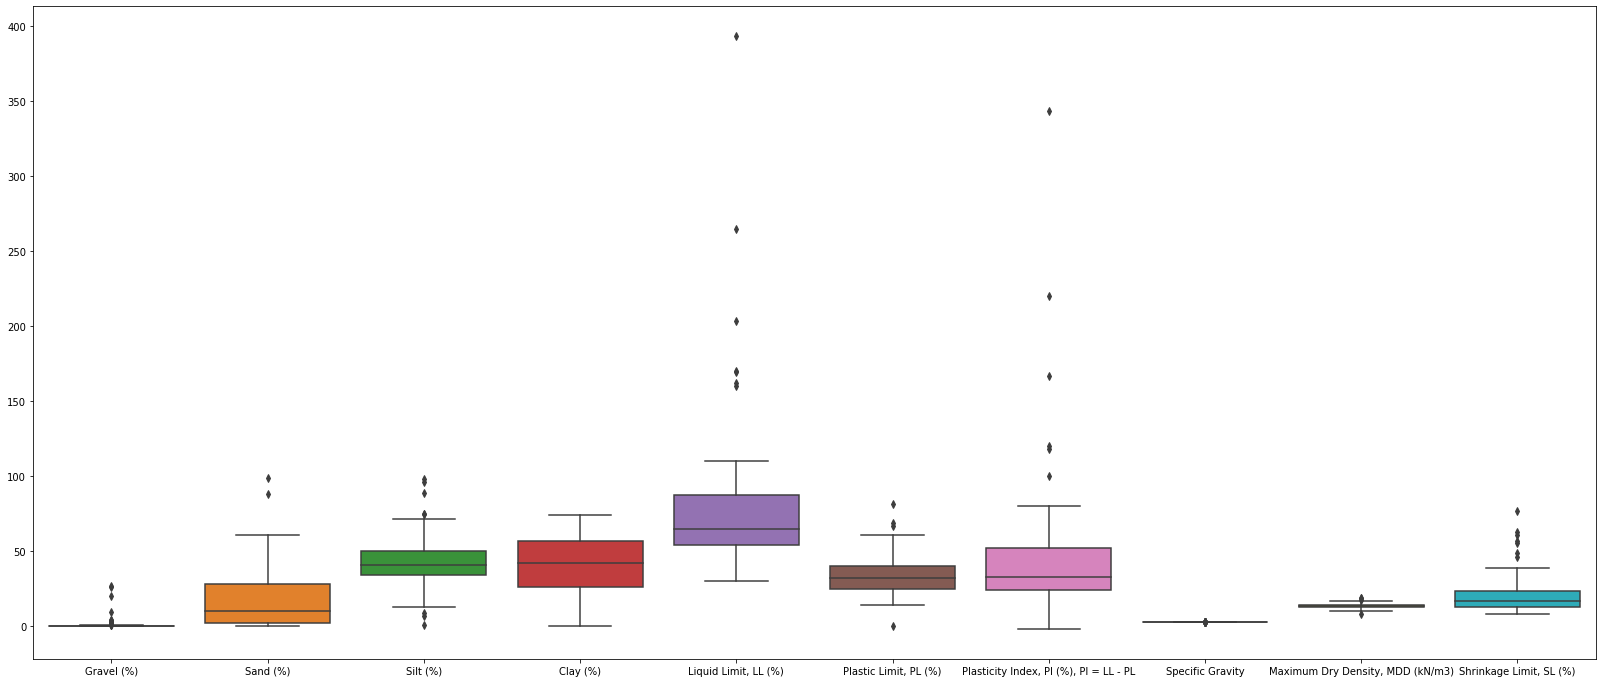

In [ ]:
plt.figure(figsize = (28,12))
sns.boxplot(data = df)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 10 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Gravel (%)                              92 non-null     float64
 1   Sand (%)                                92 non-null     float64
 2   Silt (%)                                92 non-null     float64
 3   Clay (%)                                92 non-null     float64
 4   Liquid Limit, LL (%)                    92 non-null     float64
 5   Plastic Limit, PL (%)                   92 non-null     float64
 6   Plasticity Index, PI (%), PI = LL - PL  92 non-null     float64
 7   Specific Gravity                        92 non-null     float64
 8   Maximum Dry Density, MDD (kN/m3)        92 non-null     float64
 9   Shrinkage Limit, SL (%)                 92 non-null     float64
dtypes: float64(10)
memory usage: 7.3 KB


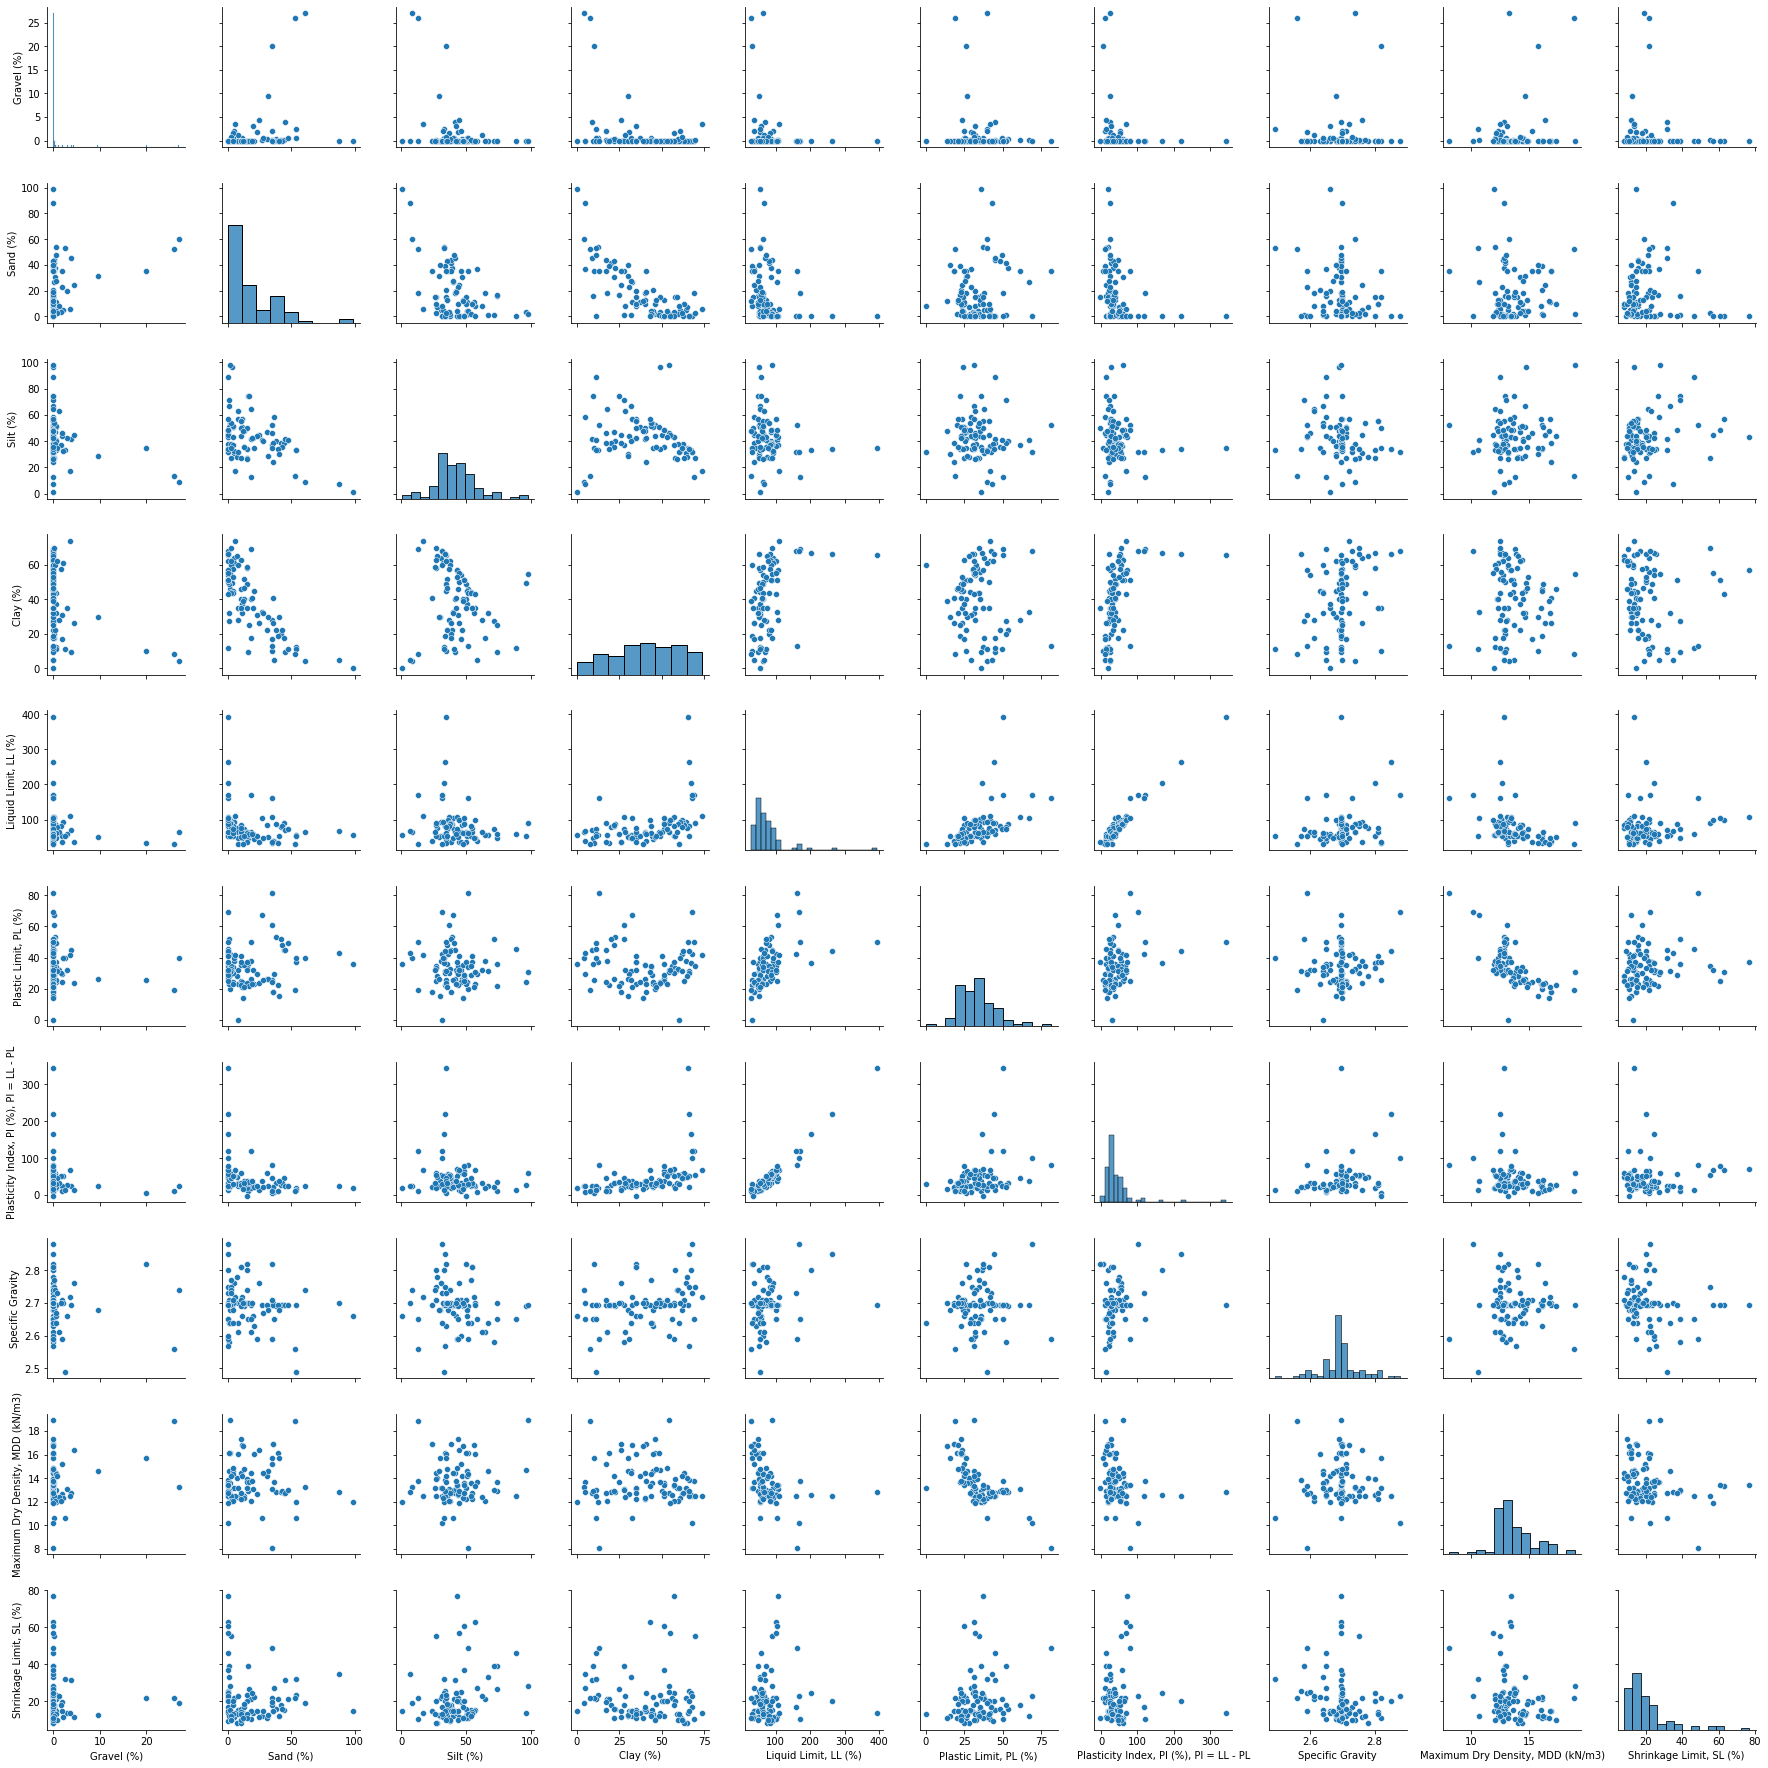

In [ ]:

sns.pairplot(df)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


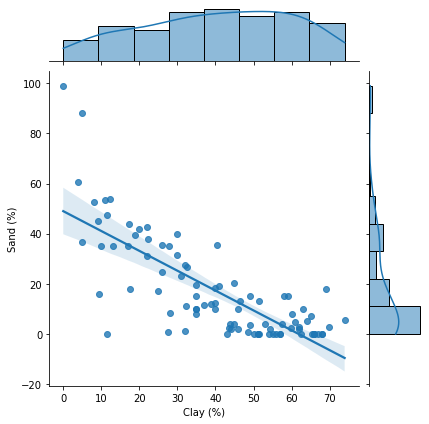

In [ ]:

sns.jointplot(df['Clay (%)'],df['Sand (%)'],kind='reg')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


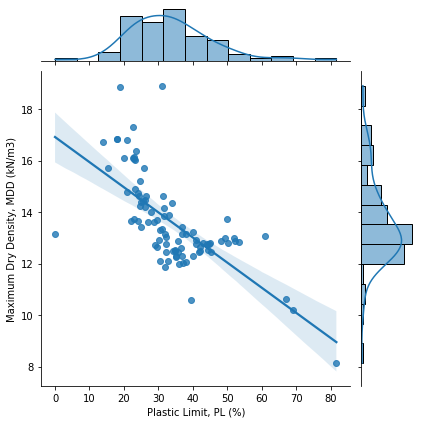

In [ ]:

sns.jointplot(df['Plastic Limit, PL (%)'],df['Maximum Dry Density, MDD (kN/m3)'],kind='reg')

In [ ]:
df

,Gravel (%),Sand (%),Silt (%),Clay (%),"Liquid Limit, LL (%)","Plastic Limit, PL (%)","Plasticity Index, PI (%), PI = LL - PL",Specific Gravity,"Maximum Dry Density, MDD (kN/m3)","Shrinkage Limit, SL (%)"
0,0.0,2.0,52.000000,46.000000,53.0,20.0,33.0,2.690000,16.1200,11.00
1,0.4,37.7,39.700000,22.200000,86.8,53.4,33.4,2.690000,12.8537,15.70
2,0.5,53.8,33.500000,12.200000,56.4,37.3,19.1,2.694085,12.0262,23.50
3,0.2,41.7,38.800000,20.000000,80.0,52.2,27.8,2.694085,12.8709,18.10
4,0.2,26.9,40.500000,32.400000,105.6,67.0,38.6,2.694085,10.6431,12.00
...,...,...,...,...,...,...,...,...,...,...
87,0.0,15.0,34.333333,48.963528,61.0,24.0,37.0,2.700000,13.6500,23.59
88,0.0,17.0,74.500000,24.957917,58.0,22.0,36.0,2.700000,13.6500,26.68
89,0.0,19.0,42.500000,40.838917,60.0,23.0,37.0,2.700000,13.7500,24.66
90,0.0,13.0,35.500000,46.476333,54.0,21.0,33.0,2.700000,14.7800,18.58


In [ ]:
df[df.columns].mean()

Gravel (%)                                 1.242717
Sand (%)                                  17.108587
Silt (%)                                  42.505906
Clay (%)                                  40.253475
Liquid Limit, LL (%)                      77.970109
Plastic Limit, PL (%)                     33.732609
Plasticity Index, PI (%), PI = LL - PL    44.237500
Specific Gravity                           2.694085
Maximum Dry Density, MDD (kN/m3)          13.627279
Shrinkage Limit, SL (%)                   21.163587
dtype: float64

In [ ]:
df.describe()


,Gravel (%),Sand (%),Silt (%),Clay (%),"Liquid Limit, LL (%)","Plastic Limit, PL (%)","Plasticity Index, PI (%), PI = LL - PL",Specific Gravity,"Maximum Dry Density, MDD (kN/m3)","Shrinkage Limit, SL (%)"
count,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000
mean,1.242717,17.108587,42.505906,40.253475,77.970109,33.732609,44.237500,2.694085,13.627279,21.163587
std,4.489499,19.868467,16.553483,19.385468,50.171567,12.373396,45.034456,0.062363,1.750046,13.018804
min,0.000000,0.000000,1.000000,0.000000,30.000000,0.000000,-2.000000,2.490000,8.130000,8.000000
25%,0.000000,1.990000,34.000000,26.000000,53.852500,24.905000,23.875000,2.667500,12.595683,13.000000
50%,0.000000,10.000000,41.100000,41.989458,64.700000,32.050000,32.800000,2.694085,13.150000,17.000000
75%,0.240000,28.275000,50.125000,57.017500,87.685000,40.002500,52.250000,2.710000,14.434725,23.522500
max,27.000000,99.000000,98.000000,73.950000,393.400000,81.700000,343.300000,2.880000,18.910000,77.000000


In [ ]:
'''1.242717	17.108587	42.255287	40.266552	77.970109	33.732609	44.237500	2.694085	13.812453	28.833182	21.163587'''

'1.242717\t17.108587\t42.255287\t40.266552\t77.970109\t33.732609\t44.237500\t2.694085\t13.812453\t28.833182\t21.163587'

In [ ]:
df.corr()

,Gravel (%),Sand (%),Silt (%),Clay (%),"Liquid Limit, LL (%)","Plastic Limit, PL (%)","Plasticity Index, PI (%), PI = LL - PL",Specific Gravity,"Maximum Dry Density, MDD (kN/m3)","Shrinkage Limit, SL (%)"
Gravel (%),1.000000,0.346754,-0.305712,-0.341949,-0.153865,-0.079580,-0.149552,-0.013501,0.230115,-0.037579
Sand (%),0.346754,1.000000,-0.440449,-0.772438,-0.247744,0.123771,-0.310010,-0.164215,0.008305,-0.080324
Silt (%),-0.305712,-0.440449,1.000000,-0.116405,-0.145254,-0.060840,-0.145108,-0.142710,0.104454,0.218039
Clay (%),-0.341949,-0.772438,-0.116405,1.000000,0.410250,-0.087013,0.480954,0.291765,-0.048736,-0.089976
"Liquid Limit, LL (%)",-0.153865,-0.247744,-0.145254,0.410250,1.000000,0.517230,0.971960,0.241660,-0.378351,0.095333
"Plastic Limit, PL (%)",-0.079580,0.123771,-0.060840,-0.087013,0.517230,1.000000,0.301477,0.066129,-0.689596,0.168943
"Plasticity Index, PI (%), PI = LL - PL",-0.149552,-0.310010,-0.145108,0.480954,0.971960,0.301477,1.000000,0.251057,-0.232041,0.059790
Specific Gravity,-0.013501,-0.164215,-0.142710,0.291765,0.241660,0.066129,0.251057,1.000000,-0.006935,-0.184175
"Maximum Dry Density, MDD (kN/m3)",0.230115,0.008305,0.104454,-0.048736,-0.378351,-0.689596,-0.232041,-0.006935,1.000000,-0.231845
"Shrinkage Limit, SL (%)",-0.037579,-0.080324,0.218039,-0.089976,0.095333,0.168943,0.059790,-0.184175,-0.231845,1.000000


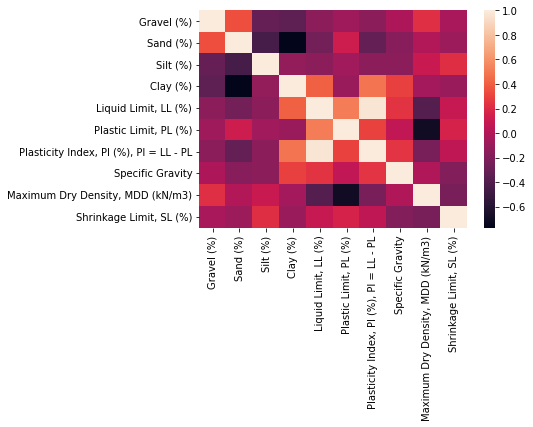

In [ ]:
sns.heatmap(df.corr())

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


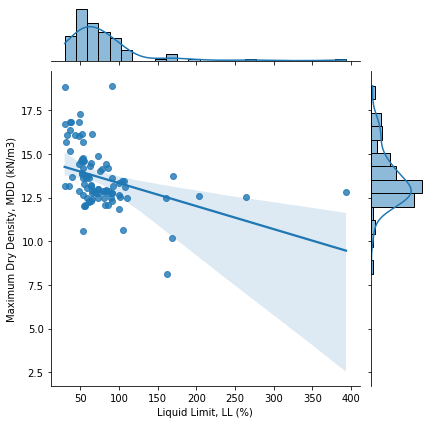

In [ ]:
sns.jointplot(df['Liquid Limit, LL (%)'],df['Maximum Dry Density, MDD (kN/m3)'],kind='reg')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


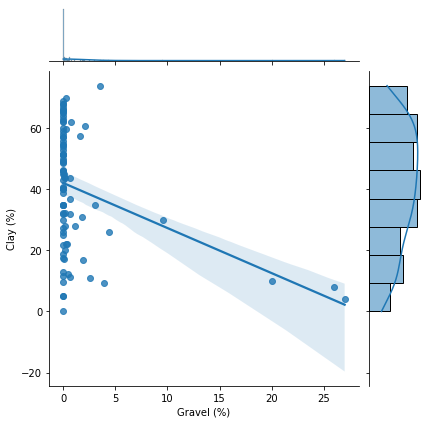

In [ ]:
sns.jointplot(df['Gravel (%)'],df['Clay (%)'],kind='reg')

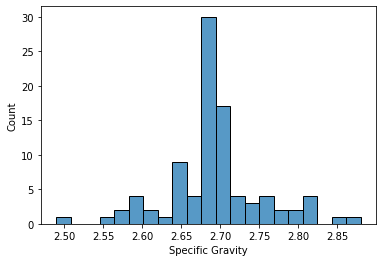

In [ ]:
sns.histplot(df['Specific Gravity'])

In [ ]:

X_train = df.drop('Shrinkage Limit, SL (%)',axis='columns')[:82]
Y_train = df['Shrinkage Limit, SL (%)'][:82]
X_test = df.drop('Shrinkage Limit, SL (%)',axis='columns')[82:]
Y_test = df['Shrinkage Limit, SL (%)'][82:]

In [ ]:
(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

((82, 9), (82,), (10, 9), (10,))

In [ ]:
scores = []

In [ ]:
model_elastic = ElasticNet(alpha=.5)
model_elastic.fit(X_train, Y_train)
Y_pred = model_elastic.predict(X_test)
elastic_score = mean_squared_error(Y_pred, Y_test)
np.sqrt(elastic_score)


18.746069376309855

In [ ]:
scores.append(np.sqrt(elastic_score))

In [ ]:
krnl = ['rbf','linear','poly','sigmoid']
for value in krnl:
  model_svr = SVR(kernel = value)
  model_svr.fit(X_train, Y_train)
  Y_pred = model_svr.predict(X_test)
  print(np.sqrt(mean_squared_error(Y_pred, Y_test)))


21.8282689695445
20.12008110289599
20.495809201261967
21.782639336925637


In [ ]:
model_svr_final = SVR(kernel='linear')
model_svr_final.fit(X_train, Y_train)
scores.append(np.sqrt(mean_squared_error(model_svr_final.predict(X_test), Y_test)))

In [ ]:
depth = [3,4,5]
for depth in depth:
  model_forest = RandomForestRegressor(max_depth=depth)
  model_forest.fit(X_train, Y_train)
  Y_pred = model_forest.predict(X_test)
  print(np.sqrt(mean_squared_error(Y_pred, Y_test)))

14.524471993184118
13.013331894853982
14.039349060674652


In [ ]:
model_forest_final = RandomForestRegressor(max_depth=5)
model_forest_final.fit(X_train, Y_train)
scores.append(np.sqrt(mean_squared_error(model_forest_final.predict(X_test), Y_test)))

In [ ]:
model_tree = DecisionTreeRegressor()
model_tree.fit(X_train, Y_train)
Y_pred = model_tree.predict(X_test)
print(np.sqrt(mean_squared_error(Y_pred, Y_test)))
scores.append(np.sqrt(mean_squared_error(Y_pred, Y_test)))

15.66616289970202


In [ ]:
scores

[18.746069376309855, 20.12008110289599, 13.159854530177896, 15.66616289970202]

In [ ]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(32, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(32, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [ ]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(X_train))
normalizer

In [ ]:

dnn_model = build_and_compile_model(normalizer)
dnn_model.fit(X_train, Y_train, validation_split=0.2, verbose=0, epochs=100)
dnn_model.evaluate(X_train, Y_train, verbose =0)

5.796616554260254

In [ ]:
dnn_model.evaluate(X_test, Y_test,verbose=0)


17.7778263092041

In [ ]:
scores.append(dnn_model.evaluate(X_test, Y_test,verbose=0))



In [ ]:
x_axis = ['ElasticNet', 'SVR', 'RandomForest', 'DecisionTree', 'DNN']


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


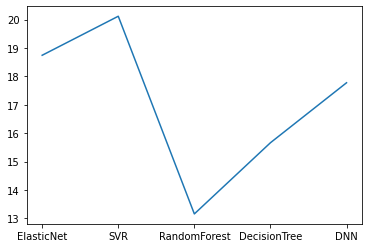

In [ ]:
sns.lineplot(x_axis, scores)